# Path finding algorithms

Trying to understand how different path finding algorithms work, to be used hopefully solve Day 18 and Da 20 puzzles

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using maze from Day 18 as example, removing keys and doors

(40, 40) (79, 79)


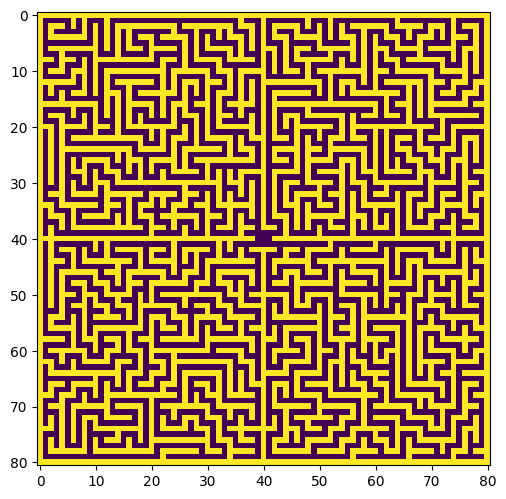

In [22]:
with open("./data/input18.txt") as f:
    amaze = [l.rstrip('\n') for l in f]

WALL  = 1
EMPTY = 0
START = EMPTY
DOOR  = EMPTY
KEY   = EMPTY

def amaze2matrix(amaze):
    nrow = len(amaze)
    ncol = len(amaze[0])
    shape = (nrow,ncol)
    maze = np.zeros(shape)
    x0 = np.zeros(2)    
    doors = {}
    keys = {}
    j = 0
    for l in amaze:
        i = 0
        for c in l:
            if c=='#':
                maze[j][i] = WALL
            elif c=='.':
                maze[j][i] = EMPTY
            elif c=='@':
                maze[j][i] = EMPTY
                start = (i,j) 
            else:
                if c.isupper():
                    maze[j][i] = DOOR
                    doors[c] = (i,j)
                else:
                    maze[j][i] = KEY
                    keys[c] = (i,j)
            i+=1
        j+=1
    return maze, doors, keys, start

maze, doors, keys, start = amaze2matrix(amaze)


fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(maze)

end = (79,79)
print(start,end)

In [23]:
def drawPath(path,theMaze):
    maze = list(theMaze)
    for c in path:
        x,y = c
        maze[y][x] = VISITED
    return maze

## Breadth First Search

In [24]:
from queue import Queue

WALL    = 1
VISITED = 3

## Coordinates for a given position are encoded as (x,y) tuple
def getAdjacent(n):
    '''returns list of adiacent cells'''
    x,y = n
    return [(x-1,y), # W
            (x,y-1), # N
            (x+1,y), # E
            (x,y+1)] # S

def BFS(start, end, theMaze):
    '''Find shorter path between two position in the maze using BFS algorithm'''
    maze = np.copy(theMaze)
    queue = Queue()
    queue.put([start]) # wrap the starting cell tuple in a list
    lenmax = 1
    while not queue.empty():
        path = queue.get() # get a path form the paths' queur
        c = path[-1] # take last step of current path
        if c == end:
            return path
        for a in getAdjacent(c): # explore adjacent cells
            x,y = a
            if maze[y][x] == WALL or maze[y][x] == VISITED: # if a dead is reached (all WALL or VISITED) path gets dequeued
                continue
            else:
                maze[y][x] = VISITED
                new_path = list(path)
                new_path.append(a)
                queue.put(new_path) # store back the path in the queue with the new step
    #print("END position not reachable")
    return []



In [26]:
import time

start_time = time.time()

path = BFS(start,end,maze)

print("--- %s seconds ---" % (time.time() - start_time))
print(len(path))

--- 0.053859710693359375 seconds ---
151


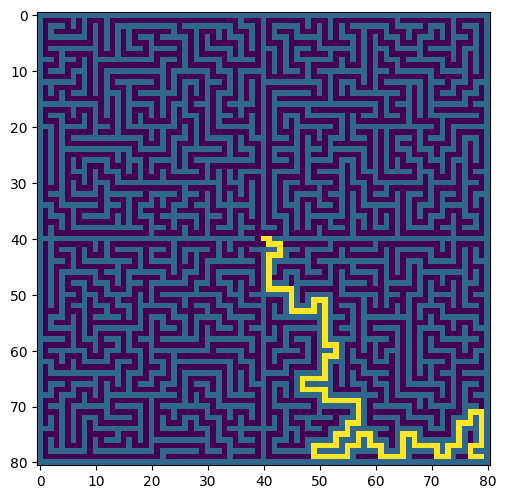

In [27]:
mazepath = drawPath(path,maze)
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(maze)

## A*

http://theory.stanford.edu/~amitp/GameProgramming/AStarComparison.html